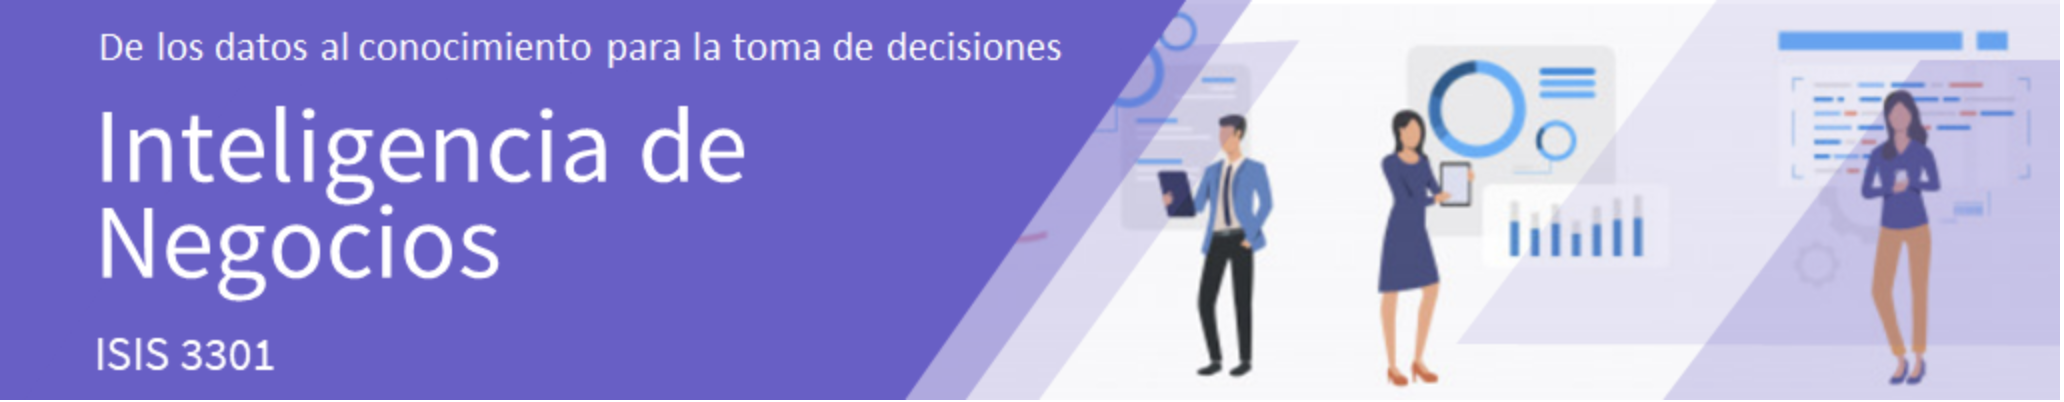

# Laboratorio 1 - Clasificación

### Integrantes:
* Natalia Sanabria Forero - 201532265
* Jorge Andrés Esguerra Alarcón - 201719920
* Christian Forigua - 

## 1. Carga

In [47]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 50)

#Random seed

np.random.seed(3301)
db_location = "dataset.csv"
data = pd.read_csv(db_location, delimiter=";")

In [48]:
# Dimensiones de los datos
rows, cols = data.shape

print(f"filas: {rows}, columnas: {cols}")

filas: 768, columnas: 11


In [49]:
# Demostración de los datos para claridad
display(data.sample(5))

,Hair color,Pregnancies,Glucose,City,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
235,Black,4,171,New York,72,0,0,436,479,26,1
295,Black,6,151,New York,62,31,120,355,692,28,0
144,Black,4,154,New York,62,31,284,328,237,23,0
292,Black,2,128,New York,78,37,182,433,1224,31,1
60,Black,2,84,New York,0,0,0,0,304,21,0


## 2. Descripción de los datos

In [50]:
# Calidad de los datos
# Por facilidad de manipulación y estandarización, los nombres de columnas que estan en PascalCase o separados por espacio 
# como el Hair color serán pasados a snake_case.

snake_case_names = {"Hair color": "hair_color",
                    "Pregnancies": "pregnancies",
                    "Glucose": "glucose",
                    "BloodPressure": "blood_pressure",
                    "City": "city",
                    "SkinThickness": "skin_thickness",
                    "Insulin": "insulin",
                    "DiabetesPedigreeFunction": "diabetes_pedigree_function",
                    "Age": "age",
                    "Outcome": "outcome"}
data = data.rename(columns=snake_case_names)


data.dtypes

hair_color                    object
pregnancies                   object
glucose                       object
city                          object
blood_pressure                object
skin_thickness                object
insulin                       object
BMI                            int64
diabetes_pedigree_function    object
age                            int64
outcome                       object
dtype: object

Como se puede ver, tenemos solamente columnas de tipo string (corresponden a tipo object en pandas), e int (corresponde a int64 de numpy).

Sin embargo, las columnas de: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin y DiabetesPedigreeFunction registran un tipo object aunque su contenido en realidad es int. Esto indica que tienen un placeholder string para cuando no se registró un valor. Debemos convertirlas a int, teniendo en cuenta la conversión de los placeholders a NaN.

Primero convertimos dichas columnas, que deberían ser numéricas, a float64. Los datos que sean placeholders en string se convertiran en NaN. Luego nos desharemos de las columnas con datos que sean NaN para garantizar la calidad de los datos.

In [51]:
# Conversión de columnas mencionadas anteriormente a float64, usando coerción de errores (datos no numéricos)
headers = ["pregnancies", "glucose", "blood_pressure", "skin_thickness", "insulin", "diabetes_pedigree_function", "outcome"]
for header in headers:
    data[header] = pd.to_numeric(data[header], errors="coerce")

### Completitud

A continuación revisaremos la completitud de los datos antes de transformarlos en los tipos que puede leer el modelo.

In [52]:
df_data = (100*data.isna().sum()/len(data)).to_frame()
df_data.sort_values(0, ascending = False)

,0
pregnancies,0.130208
glucose,0.130208
blood_pressure,0.130208
skin_thickness,0.130208
insulin,0.130208
diabetes_pedigree_function,0.130208
outcome,0.130208
hair_color,0.000000
city,0.000000
BMI,0.000000


Dado que revisando los datos manualmente se ve que hay una única entrada con NaN, se decide retirarla.

In [53]:
# Eliminar filas con valores NaN para garantizar calidad de datos.

data = data.dropna()

# Mostrar tipos para ver que se hayan actualizado
data.dtypes

hair_color                     object
pregnancies                   float64
glucose                       float64
city                           object
blood_pressure                float64
skin_thickness                float64
insulin                       float64
BMI                             int64
diabetes_pedigree_function    float64
age                             int64
outcome                       float64
dtype: object

In [54]:
## Descripción de los datos numéricos

data.describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,BMI,diabetes_pedigree_function,age,outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.839635,120.921773,69.096480,20.563233,79.903520,289.670143,432.395046,38.006519,0.349413
std,3.368429,31.984561,19.366833,15.945349,115.283105,116.780873,336.144934,117.902397,0.477096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,251.500000,205.500000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,309.000000,337.000000,29.000000,0.000000
75%,6.000000,140.500000,80.000000,32.000000,127.500000,359.000000,592.000000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,671.000000,2329.000000,3256.000000,1.000000


In [55]:
#Se nota además que no hay ausencias después de llevar a cabo esta operación

data.isnull().sum()

hair_color                    0
pregnancies                   0
glucose                       0
city                          0
blood_pressure                0
skin_thickness                0
insulin                       0
BMI                           0
diabetes_pedigree_function    0
age                           0
outcome                       0
dtype: int64

### Evaluando los datos no-numéricos


In [56]:
string_columns = ["hair_color", "city"]

only_string_data = data[string_columns]

In [57]:
for col in only_string_data:
    print(f"unique values of {col}: {only_string_data[col].unique()}")
    
data = data.drop(columns=["city"])

unique values of hair_color: ['Red' 'Black' 'Blue']
unique values of city: ['New York']


Podemos concluir que estos datos no necesitan limpieza dado que no contienen valores de placeholder. 

Removemos la columna de "City", dado que contiene un único valor y no será de utilidad al crear ninguno de los modelos porque esta columna no aporta información al modelo. 

In [58]:
data

,hair_color,pregnancies,glucose,blood_pressure,skin_thickness,insulin,BMI,diabetes_pedigree_function,age,outcome
0,Red,6.0,148.0,72.0,35.0,0.0,336,627.0,50,1.0
1,Black,1.0,85.0,66.0,29.0,0.0,266,351.0,31,0.0
2,Red,8.0,183.0,64.0,0.0,0.0,233,672.0,32,1.0
3,Black,1.0,89.0,66.0,23.0,94.0,281,167.0,21,0.0
4,Black,0.0,137.0,40.0,35.0,168.0,431,2288.0,33,1.0
...,...,...,...,...,...,...,...,...,...,...
763,Black,10.0,101.0,76.0,48.0,180.0,329,171.0,63,0.0
764,Black,2.0,122.0,70.0,27.0,0.0,368,34.0,27,0.0
765,Red,5.0,121.0,72.0,23.0,112.0,262,245.0,30,0.0
766,Black,1.0,126.0,60.0,0.0,0.0,301,349.0,47,1.0


In [59]:
# Observamos la distribución del color de pelo, nuesto único dato categórico, según la cantidad de entradas.
# Usar la funcion value_counts() para contar el numero de veces que aparece un elemento.
data.hair_color.value_counts().to_frame().head(15)

,hair_color
Black,685
Red,50
Blue,32


Vemos que la cantidad de datos por color de pelo es desproporcionada a favor de una de las variables. Asimismo, el color del cabello no es un indicador de la predisposición a la diabetes, por lo que también se elimina esta columna del dataset.

In [60]:
data = data.drop(columns=["hair_color"])

In [61]:
data

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,BMI,diabetes_pedigree_function,age,outcome
0,6.0,148.0,72.0,35.0,0.0,336,627.0,50,1.0
1,1.0,85.0,66.0,29.0,0.0,266,351.0,31,0.0
2,8.0,183.0,64.0,0.0,0.0,233,672.0,32,1.0
3,1.0,89.0,66.0,23.0,94.0,281,167.0,21,0.0
4,0.0,137.0,40.0,35.0,168.0,431,2288.0,33,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,329,171.0,63,0.0
764,2.0,122.0,70.0,27.0,0.0,368,34.0,27,0.0
765,5.0,121.0,72.0,23.0,112.0,262,245.0,30,0.0
766,1.0,126.0,60.0,0.0,0.0,301,349.0,47,1.0


## Consistencia

A continuación se evalúa que los datos estén en los rangos entregados por el negocio, que se encuentran consignados en el diccionario.


In [62]:
# Resúmenes individuales

data['age'].describe()

count     767.000000
mean       38.006519
std       117.902397
min        21.000000
25%        24.000000
50%        29.000000
75%        41.000000
max      3256.000000
Name: age, dtype: float64

Para la edad se puede observar que hay al menos un valor que fue mal ingresado (el máximo que aparece como 3256) y debe retirarse al no ser un valor apto para la característica que representa.

In [63]:
data[data['age'] > 100].describe

<bound method NDFrame.describe of      pregnancies  glucose  blood_pressure  skin_thickness  insulin  BMI  \
196          1.0    105.0            58.0             0.0      0.0  243   
208          1.0     96.0            64.0            27.0     87.0  332   

     diabetes_pedigree_function   age  outcome  
196                       187.0   450      0.0  
208                       289.0  3256      0.0  >

In [64]:
data.drop(data[data['age'] > 100].index, inplace = True)
data['age'].describe()

count    765.000000
mean      33.261438
std       11.762356
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: age, dtype: float64

Una vez se lleva a cabo la modificación mencionada arriba, se puede observar que se tienen valores razonables para este criterio.

In [65]:
# Resúmenes individuales

data['blood_pressure'].describe() 

count    765.000000
mean      69.117647
std       19.387122
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: blood_pressure, dtype: float64

In [66]:
data[data['blood_pressure'] == 0].describe

<bound method NDFrame.describe of      pregnancies  glucose  blood_pressure  skin_thickness  insulin  BMI  \
7           10.0    115.0             0.0             0.0      0.0  353   
15           7.0    100.0             0.0             0.0      0.0   30   
49           7.0    105.0             0.0             0.0      0.0    0   
60           2.0     84.0             0.0             0.0      0.0    0   
78           0.0    131.0             0.0             0.0      0.0  432   
81           2.0     74.0             0.0             0.0      0.0    0   
172          2.0     87.0             0.0            23.0      0.0  289   
193         11.0    135.0             0.0             0.0      0.0  523   
222          7.0    119.0             0.0             0.0      0.0  252   
261          3.0    141.0             0.0             0.0      0.0   30   
266          0.0    138.0             0.0             0.0      0.0  363   
269          2.0    146.0             0.0             0.0      0.0

Según el diccionario, este campo debe contener valores mayores a 0 (y normales en el rango de 120/80). En este sentido los datos que aparecen con presión como 0 deben revisarse.

In [67]:
# Resúmenes individuales

data['glucose'].describe() #Según el diccionario los valores normales son desde 140 - 190 pero el 75% de los datos están por debajo

count    765.000000
mean     120.975163
std       32.008477
min        0.000000
25%       99.000000
50%      117.000000
75%      141.000000
max      199.000000
Name: glucose, dtype: float64

/Users/jorgea/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


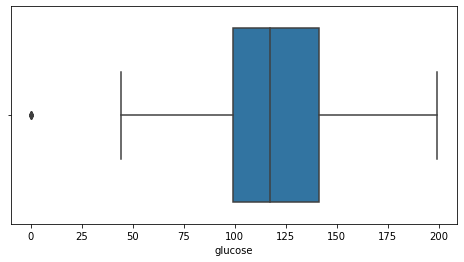

In [68]:
# canciones populares.
fig=plt.figure(figsize=(8,4))
ax = sns.boxplot("glucose", data=data, orient="x")

In [69]:
# Resúmenes individuales

data['pregnancies'].describe()

count    765.000000
mean       3.847059
std        3.369696
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: pregnancies, dtype: float64

En el caso del número de embarazos podemos observar que se cumplen las restricciones del diccionario y que todos los datos son reales positivos

In [70]:
# Resúmenes individuales

data['BMI'].describe()

count    765.000000
mean     289.675817
std      116.911406
min        0.000000
25%      252.000000
50%      309.000000
75%      359.000000
max      671.000000
Name: BMI, dtype: float64

In [71]:
# Resúmenes individuales

data['diabetes_pedigree_function'].describe()

count     765.000000
mean      432.903268
std       336.427137
min         1.000000
25%       206.000000
50%       338.000000
75%       593.000000
max      2329.000000
Name: diabetes_pedigree_function, dtype: float64

Para este campo el diccionario no provee información sobre el rango de valores que deben tomar los datos.

In [72]:
# Resúmenes individuales

data['skin_thickness'].describe()
data.describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,BMI,diabetes_pedigree_function,age,outcome
count,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000
mean,3.847059,120.975163,69.117647,20.581699,79.998693,289.675817,432.903268,33.261438,0.350327
std,3.369696,32.008477,19.387122,15.947154,115.397373,116.911406,336.427137,11.762356,0.477384
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,252.000000,206.000000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,309.000000,338.000000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.000000,359.000000,593.000000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,671.000000,2329.000000,81.000000,1.000000


En este campo se tiene que el 25% de los datos son 0 mm, lo cual no es representativo de la realidad

### Modelo de Decision Tree Classifier

#### La columna objetivo va a ser la columna de outcome donde 1 indica que tiene diabetes y 0 lo contrario.

In [73]:
## Sacamos una variable que tenga los nombres de todos los features menos la clase a predecir.

feature_names = data.columns
feature_names = feature_names.drop("outcome")
feature_names = feature_names.tolist()

In [74]:
## Test-train split
## La distribución es 75% de las entradas para entrenamiento, el 25% restante para test.
X_train, X_test, Y_train, Y_test = train_test_split(data[feature_names], data['outcome'], random_state=0)

#### Estrategia para escoger la mejor profundidad para el árbol de decisión
De entrada, no hay certeza sobre el hiperparámetro max_depth para nuestro árbol de decisión. 
Tampoco queremos que la profundidad sea muy alta, para evitar sobreajuste en el modelo. 
Por ende, iteraremos sobre profundidades maximas de 2 a 7 nuestro árbol, y nos quedaremos con el mejor árbol.

#### Contexto de negocio
##### ¿Cómo determinar el mejor árbol?
Ahora bien, el problema de negocio a tratar es la predicción de diabetes en pacientes, dado un conjunto de parámetros. 

En este caso, la gravedad de las predicciones incorrectas no tiene el mismo impacto para el negocio.
Un falso positivo para este campo de estudio es un caso que el modelo predice como diabético pero en realidad no lo es. 
Un falso negativo es un caso que el modelo predice como sano, pero en realidad es diabético. 

Podemos afirmar que un falso positivo es un resultado menos perjudicial que un falso negativo, dado que si a un paciente enfermo de diabetes se le informa que está sano, corre grandes riesgos de salud. En cambio, un falso positivo podrá descartarse sin poner en riesgo su salud, simplemente mediante la realización de otro examen clínico para reforzar el diagnóstico.

Con ello en mente, las métricas que utilizaremos para escoger el mejor árbol que más tienen sentido para el caso de negocio son f1_score y recall.

Para justificar la decisión, debemos comprender la definición de precisión, recall, y f1_score.

#### Definiciones
La precisión es:

Se calcula como:

El recall es:

Se calcula como:

El f1_score es una medida que incorpora tanto precisión como recall, y se calcula de la siguiente forma:



In [75]:
## Usando RECALL como métrica.

## imports para el modelo y sus métricas de calidad
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


## Revisar mejor valor de hiperparámetro max_depth para el modelo, basado en 
## recall score. 
max_depth_range = list(range(2, 7))
recall_scores = []
f1_scores = []

for depth in max_depth_range:
    # Por defecto el criterio es gini.
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    recall_result = recall_score(Y_test, Y_pred)
    f1_result = f1_score(Y_test, Y_pred)
    recall_scores.append(recall_result)
    f1_scores.append(f1_result)

    
## Mostrar resultados para cada profundidad intentada

for i in range(len(max_depth_range)):
    print(f"max_depth={i+2} -> recall: {recall_scores[i]}, f1_score: {f1_scores[i]}")


max_depth=2 -> recall: 0.4126984126984127, f1_score: 0.553191489361702
max_depth=3 -> recall: 0.6984126984126984, f1_score: 0.6470588235294118
max_depth=4 -> recall: 0.6031746031746031, f1_score: 0.6031746031746031
max_depth=5 -> recall: 0.5238095238095238, f1_score: 0.5892857142857143
max_depth=6 -> recall: 0.5238095238095238, f1_score: 0.5546218487394958


##### Resultado:
De los resultados presentados, vemos que el hiperparámetro max_depth=3 nos otorga el modelo con mejor recall y con mejor f1_score.

En otras palabras, el árbol de decisión con profundidad máxima 3 es el mejor modelo que hemos generado según las restricciones de negocio. 

Por lo tanto, procedemos a plottear el árbol para poder entender qué modelo se constituyó.



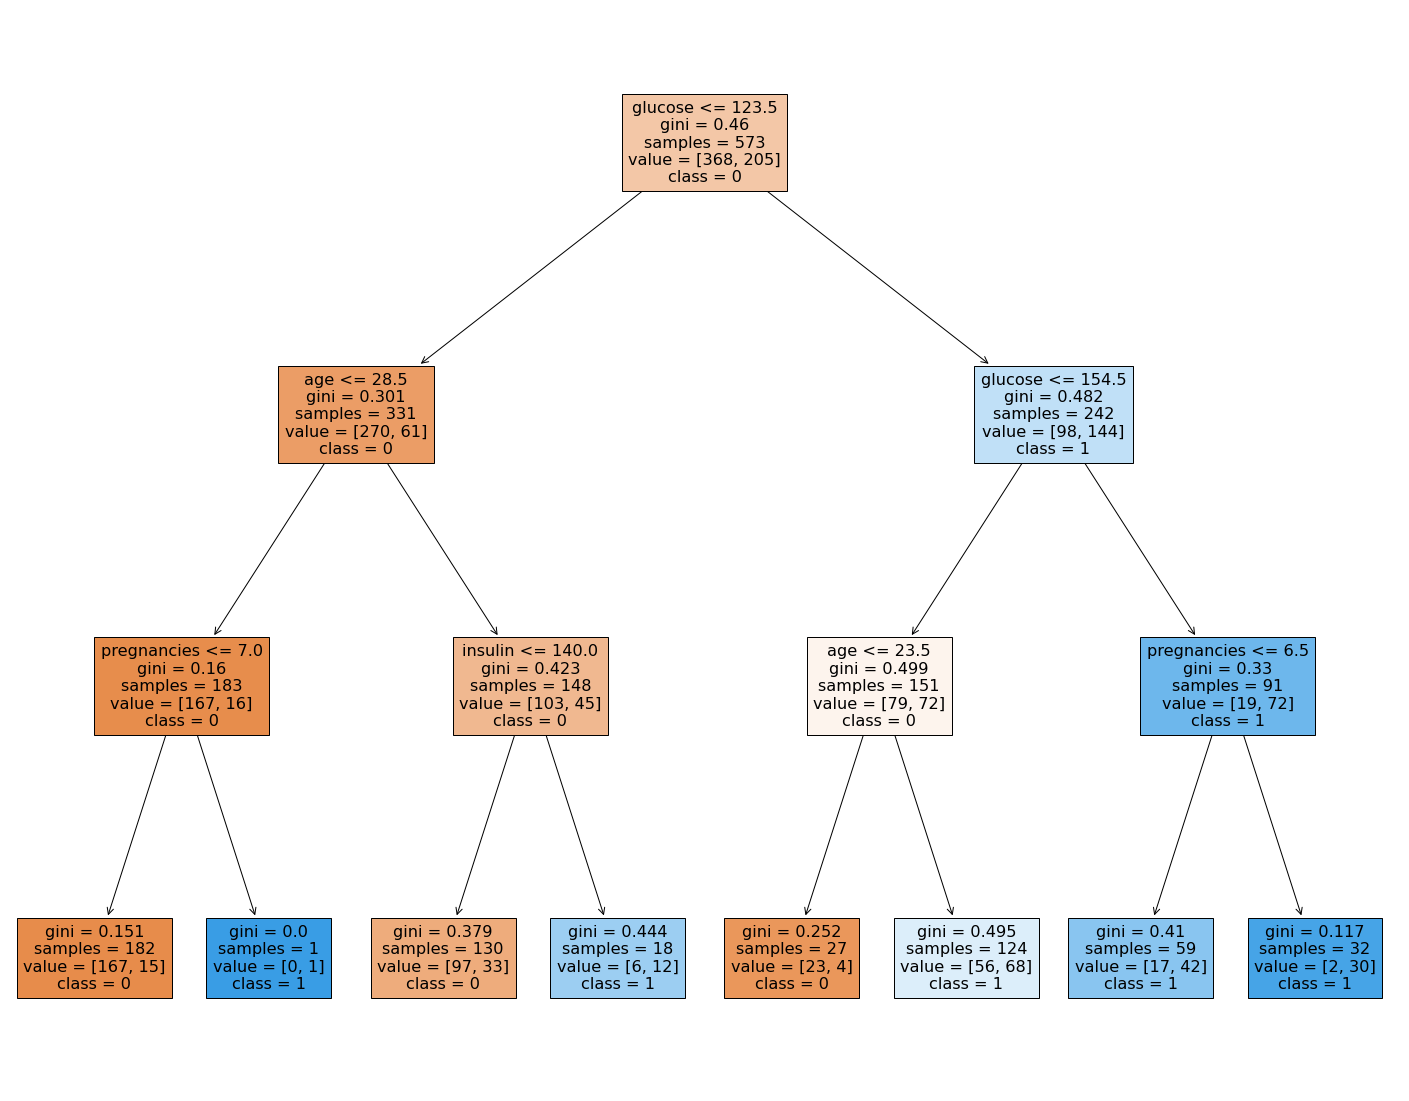

In [76]:
# Calcular explicitamente el mejor árbol

best_tree_clf = DecisionTreeClassifier(max_depth = 3, random_state = 0)
best_tree_clf.fit(X_train, Y_train)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_tree_clf, 
                   feature_names=feature_names,  
                   class_names=["0", "1"],
                   filled=True)

#### Explicación del módelo de Árbol de Decisión

##### Conceptos:
Se asume que el lector está familiarizado con la estructura de datos de árbol binario.

Raíz: Nódo principal del árbol, simboliza la regla de decisión del primer split que se hará sobre el conjunto de datos inicial. Cobija todos los datos.
Nodo intermedio: Nódo del árbol que simboliza una regla de decisión a partir de la cual se seguirá haciendo split del subconjunto de datos del nodo.
Hoja: Nódo del árbol que no representa un split a realizar, sino simplemente un grupo de elementos que quedaron clasificados bajo un conjunto de reglas de decisión. 


El Árbol de decisión es un algoritmo greedy que descubre reglas condicionales para aplicar sobre un conjunto de datos, buscando maximizar la pureza de las hojas.

##### Work In Progress